In [1]:
import pandas as pd
import cv2
import glob
from keras_retinanet.utils.image import read_image_bgr, resize_image
import random
import numpy as np
import progressbar
import matplotlib.pyplot as plt
from keras_retinanet.utils.image import read_image_bgr, resize_image
import os

In [2]:
df = pd.read_csv('train_final.csv')

In [3]:
df.tail(5)

,./datasets/VOC2012/JPEGImages/2008_001210.jpg,3,76,293,437,others
61551,./datasets/towncentre/frame-4500.jpg,814,252,882,435,person
61552,./datasets/towncentre/frame-4500.jpg,480,240,552,416,person
61553,./datasets/towncentre/frame-4500.jpg,1245,84,1295,224,person
61554,./datasets/towncentre/frame-4500.jpg,1385,121,1441,271,person
61555,./datasets/towncentre/frame-4500.jpg,1540,530,1638,781,person


In [4]:
df.columns = [ 'image', 'x1', 'y1', 'x2', 'y2', 'class']

In [5]:
df.head(5),df.shape

(                                           image   x1   y1   x2   y2   class
 0  ./datasets/VOC2012/JPEGImages/2010_001257.jpg  324  307  353  362  others
 1  ./datasets/VOC2012/JPEGImages/2010_001257.jpg  267  312  312  374  others
 2  ./datasets/VOC2012/JPEGImages/2010_001257.jpg  199  308  261  395  others
 3  ./datasets/VOC2012/JPEGImages/2010_001257.jpg   81  297  184  379  others
 4  ./datasets/VOC2012/JPEGImages/2010_001257.jpg    1  332   83  438  others,
 (61556, 6))

In [6]:
df = df[df['class']!='trafficcone'] # there are no traffic cone classes in the csv

In [7]:
df.shape

(61556, 6)

In [8]:
simdf = df[df['image'].str.contains('sim-data')]

In [9]:
simdf.head(5)

,image,x1,y1,x2,y2,class
40137,./datasets/sim-data/camera4_23042019233526.jpg,1636,287,1843,438,car
40138,./datasets/sim-data/camera4_23042019233526.jpg,1348,443,1655,698,car
40139,./datasets/sim-data/camera4_23042019233526.jpg,1834,210,1919,268,car
40140,./datasets/sim-data/camera4_23042019233526.jpg,1151,384,1423,582,car
40141,./datasets/sim-data/camera4_23042019233526.jpg,1755,243,1887,327,car


In [10]:
simdf.shape

(17535, 6)

In [11]:
simdf=simdf[:5]

In [12]:
simdf

,image,x1,y1,x2,y2,class
40137,./datasets/sim-data/camera4_23042019233526.jpg,1636,287,1843,438,car
40138,./datasets/sim-data/camera4_23042019233526.jpg,1348,443,1655,698,car
40139,./datasets/sim-data/camera4_23042019233526.jpg,1834,210,1919,268,car
40140,./datasets/sim-data/camera4_23042019233526.jpg,1151,384,1423,582,car
40141,./datasets/sim-data/camera4_23042019233526.jpg,1755,243,1887,327,car


In [13]:
widgets=[
    ' [', progressbar.Timer(), '] ',
    progressbar.Bar(),
    ' (', progressbar.ETA(), ') ',
]

In [14]:
cones_major = [file for file in glob.glob('./datasets/cones/real/*.png')]
len(cones_major)

248

In [15]:
 path = './Images'

In [16]:
for back_image_file in (simdf['image'].unique()):
    back_image = cv2.imread(back_image_file)
    imshape = back_image.shape
    num_cones = random.randint(1,30)
    cones = random.choices(cones_major,k=num_cones)
    coordinates = []
    for index in range(num_cones):
        cone_img = cv2.imread(cones[index])
        cone_shape = cone_img.shape
        max_cone_size = random.randint(45, 55)
        cone_img, _ = resize_image(cone_img, min_side=45, max_side=max_cone_size)
        cone_shape = cone_img.shape
        x,y = (int((imshape[1] - cone_shape[1]) * np.random.uniform()),
                int((imshape[0] - cone_shape[0]) // 2 *(np.random.uniform() + 1))
                )
        back_image[y:y+cone_shape[0],x:x+cone_shape[1]] = cone_img
        #cv2.imwrite(os.path.join(path, back_image_file),back_image)
        cv2.imwrite("temp.jpg",back_image)
        cone_annotation = {'image':back_image_file,'x1':x,'y1':y,'x2':x+cone_shape[1], 'y2':y+cone_shape[0],'class':'trafficcone'}
        df = df.append(cone_annotation, ignore_index=True)

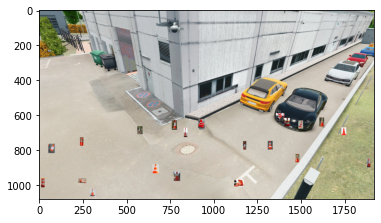

In [17]:
temp= cv2.imread("temp.jpg")
dst = cv2.cvtColor(temp, cv2.COLOR_BGR2RGB)
plt.imshow(dst)

In [ ]:
df.to_csv('trafficcone-train.csv',header=None,index=False)

In [ ]:
df_val = pd.read_csv('val_final.csv', header=None)
df_val.columns = ['image', 'x1', 'y1', 'x2', 'y2', 'class']

In [ ]:
df_val = df_val.append(df.iloc[-5000:])
df_train = df.iloc[:-4999]
df_val.to_csv('trafficcone-val.csv',index=False,header=None)

In [ ]:
sim = df[df['class']=='trafficcone']
sim.to_csv('sim_data.csv',header=None,index=False)